In [1]:
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

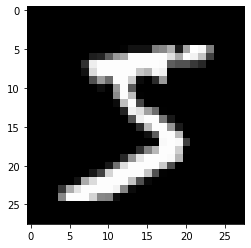

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
plt.subplot()
plt.imshow(X_train[0], cmap = plt.get_cmap('gray'))
plt.show()

print(X_train[0])

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
num_classes = y_test.shape[1]
print(num_classes)

10


In [9]:
#def baseline model
def baseline_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape = (28, 28, 1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model


In [10]:
model = baseline_model()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Baseline Error: %0.2f%%' % (100 - scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 49s - loss: 0.3744 - accuracy: 0.8846 - val_loss: 0.0814 - val_accuracy: 0.9752
Epoch 2/10
60000/60000 - 43s - loss: 0.0947 - accuracy: 0.9708 - val_loss: 0.0447 - val_accuracy: 0.9850
Epoch 3/10
60000/60000 - 42s - loss: 0.0664 - accuracy: 0.9793 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 4/10
60000/60000 - 43s - loss: 0.0554 - accuracy: 0.9831 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 5/10
60000/60000 - 44s - loss: 0.0466 - accuracy: 0.9855 - val_loss: 0.0272 - val_accuracy: 0.9908
Epoch 6/10
60000/60000 - 44s - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0287 - val_accuracy: 0.9910
Epoch 7/10
60000/60000 - 44s - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0245 - val_accuracy: 0.9921
Epoch 8/10
60000/60000 - 44s - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0222 - val_accuracy: 0.9927
Epoch 9/10
60000/60000 - 43s - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch

In [11]:
model.save('model.h5')


In [12]:
model.predict(X_test[1].reshape(1, 28, 28, 1))
#print((X_test[1].reshape(1, 28, 28, 1)).shape)

array([[2.8832590e-06, 6.8303351e-08, 9.9999678e-01, 5.5132965e-09,
        2.8462688e-09, 2.3887899e-12, 3.6056946e-09, 4.2001489e-08,
        2.3817077e-07, 1.0550575e-11]], dtype=float32)

In [13]:
print(y_test[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
print(X_test[1])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 